[View in Colaboratory](https://colab.research.google.com/github/tthanaruk/Intent-Classification-using-neural-networks/blob/master/gluoncv.ipynb)

In [11]:
!pip install gluoncv
!pip install mxnet

In [12]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [13]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

Model file is not found. Downloading.


100%|██████████| 132724/132724 [00:04<00:00, 30423.45KB/s]


In [14]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')


117KB [00:00, 2979.96KB/s]             


In [22]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fish.jpeg to fish.jpeg
User uploaded file "fish.jpeg" with length 9933 bytes


In [16]:
#from mxnet import image
#img = image.imread('Duck.jpg')

In [17]:
!ls

datalab  Duck (1).jpg  Duck.jpg  Pekin Duck.jpg  street_small.jpg


In [24]:
x, img = data.transforms.presets.ssd.load_test('fish.jpeg', short=512)#im_fname
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 898)


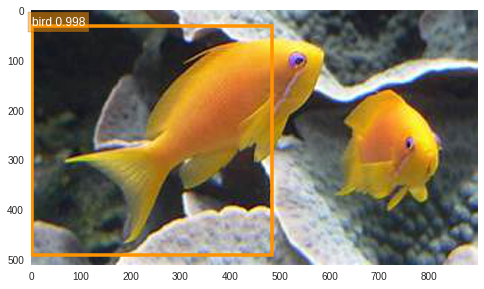

In [25]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
ax.grid(False)
plt.savefig('testplot.png')
plt.show()

In [20]:

!ls
files.download('testplot.png') 

datalab  Duck (1).jpg  Duck.jpg  Pekin Duck.jpg  street_small.jpg  testplot.png
